In [136]:
### Alex Zhang 512910

In [137]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [138]:
import psycopg2 as ps2
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
connection = ps2.connect(
    host="localhost",
    database="dvdrental",
    user="postgres",
    password="password"
)

In [140]:
cursor = connection.cursor()
query = """SELECT r.rental_id, film.title, payment.amount
           FROM rental AS r
           JOIN inventory ON r.inventory_id = inventory.inventory_id
           JOIN film ON inventory.film_id = film.film_id
           JOIN payment ON r.rental_id = payment.rental_id
           ORDER BY film.title;
"""

cursor.execute(query)
result = cursor.fetchall()

In [141]:
df1 = pd.DataFrame(result, columns=["rental_id", "film.title", "payment.amount"])

In [142]:
df1

,rental_id,film.title,payment.amount
0,12651,Academy Dinosaur,0.99
1,14098,Academy Dinosaur,3.99
2,4390,Academy Dinosaur,0.99
3,14624,Academy Dinosaur,0.99
4,4863,Academy Dinosaur,0.99
...,...,...,...
14591,12281,Zorro Ark,4.99
14592,2307,Zorro Ark,6.99
14593,5972,Zorro Ark,7.99
14594,14599,Zorro Ark,4.99


In [143]:
cursor = connection.cursor()
query = """SELECT c.last_name, c.first_name, c.email
           FROM customer AS c
           ORDER BY last_name;
"""

cursor.execute(query)
result = cursor.fetchall()

In [144]:
df2 = pd.DataFrame(result, columns=["last_name", "first_name", "email"])
df2

,last_name,first_name,email
0,Abney,Rafael,rafael.abney@sakilacustomer.org
1,Adam,Nathaniel,nathaniel.adam@sakilacustomer.org
2,Adams,Kathleen,kathleen.adams@sakilacustomer.org
3,Alexander,Diana,diana.alexander@sakilacustomer.org
4,Allard,Gordon,gordon.allard@sakilacustomer.org
...,...,...,...
594,Wright,Brenda,brenda.wright@sakilacustomer.org
595,Wyman,Brian,brian.wyman@sakilacustomer.org
596,Yanez,Luis,luis.yanez@sakilacustomer.org
597,Yee,Marvin,marvin.yee@sakilacustomer.org


In [145]:
cursor = connection.cursor()
query = """SELECT c.first_name, c.last_name, 
           concat(concat(first_name, ' '), last_name) AS name, c.email, active
        
           FROM customer AS c
           ORDER BY last_name;
"""

cursor.execute(query)
result = cursor.fetchall()

In [146]:
df2 = pd.DataFrame(result, columns=[ "first_name", "last_name",
                                    "name", "email", "active"])
df2

,first_name,last_name,name,email,active
0,Rafael,Abney,Rafael Abney,rafael.abney@sakilacustomer.org,1
1,Nathaniel,Adam,Nathaniel Adam,nathaniel.adam@sakilacustomer.org,1
2,Kathleen,Adams,Kathleen Adams,kathleen.adams@sakilacustomer.org,1
3,Diana,Alexander,Diana Alexander,diana.alexander@sakilacustomer.org,1
4,Gordon,Allard,Gordon Allard,gordon.allard@sakilacustomer.org,1
...,...,...,...,...,...
594,Brenda,Wright,Brenda Wright,brenda.wright@sakilacustomer.org,1
595,Brian,Wyman,Brian Wyman,brian.wyman@sakilacustomer.org,1
596,Luis,Yanez,Luis Yanez,luis.yanez@sakilacustomer.org,1
597,Marvin,Yee,Marvin Yee,marvin.yee@sakilacustomer.org,1


In [147]:
cursor = connection.cursor()
query = """SELECT c.first_name, c.last_name, 
           concat(concat(first_name, ' '), last_name) AS name, c.email, active
        
           FROM customer AS c
           WHERE active = 1
           ORDER BY last_name;
"""

cursor.execute(query)
result = cursor.fetchall()

In [148]:
df2 = pd.DataFrame(result, columns=[ "first_name", "last_name",
                                    "name", "email", "active"])
df2

,first_name,last_name,name,email,active
0,Rafael,Abney,Rafael Abney,rafael.abney@sakilacustomer.org,1
1,Nathaniel,Adam,Nathaniel Adam,nathaniel.adam@sakilacustomer.org,1
2,Kathleen,Adams,Kathleen Adams,kathleen.adams@sakilacustomer.org,1
3,Diana,Alexander,Diana Alexander,diana.alexander@sakilacustomer.org,1
4,Gordon,Allard,Gordon Allard,gordon.allard@sakilacustomer.org,1
...,...,...,...,...,...
579,Brenda,Wright,Brenda Wright,brenda.wright@sakilacustomer.org,1
580,Brian,Wyman,Brian Wyman,brian.wyman@sakilacustomer.org,1
581,Luis,Yanez,Luis Yanez,luis.yanez@sakilacustomer.org,1
582,Marvin,Yee,Marvin Yee,marvin.yee@sakilacustomer.org,1


In [149]:
cursor = connection.cursor()
query = """SELECT c.first_name, c.last_name, c.store_id, 
           concat(concat(first_name, ' '), last_name) AS name, c.email, active
        
           FROM customer AS c
           WHERE active = 1
           ORDER BY last_name;
"""

cursor.execute(query)
result = cursor.fetchall()

df2 = pd.DataFrame(result, columns=[ "first_name", "last_name", "store_id", 
                                    "name", "email", "active"])
df2

,first_name,last_name,store_id,name,email,active
0,Rafael,Abney,1,Rafael Abney,rafael.abney@sakilacustomer.org,1
1,Nathaniel,Adam,1,Nathaniel Adam,nathaniel.adam@sakilacustomer.org,1
2,Kathleen,Adams,2,Kathleen Adams,kathleen.adams@sakilacustomer.org,1
3,Diana,Alexander,1,Diana Alexander,diana.alexander@sakilacustomer.org,1
4,Gordon,Allard,1,Gordon Allard,gordon.allard@sakilacustomer.org,1
...,...,...,...,...,...,...
579,Brenda,Wright,2,Brenda Wright,brenda.wright@sakilacustomer.org,1
580,Brian,Wyman,1,Brian Wyman,brian.wyman@sakilacustomer.org,1
581,Luis,Yanez,1,Luis Yanez,luis.yanez@sakilacustomer.org,1
582,Marvin,Yee,2,Marvin Yee,marvin.yee@sakilacustomer.org,1


In [150]:
def email_address(row):
        if row["store_id"] % 2 == 0:
            return "joe.person@wustl.edu"
        else:
            return row["email"]
   
    
df2["email"] = df2.apply(email_address, axis = 1)

df2

,first_name,last_name,store_id,name,email,active
0,Rafael,Abney,1,Rafael Abney,rafael.abney@sakilacustomer.org,1
1,Nathaniel,Adam,1,Nathaniel Adam,nathaniel.adam@sakilacustomer.org,1
2,Kathleen,Adams,2,Kathleen Adams,joe.person@wustl.edu,1
3,Diana,Alexander,1,Diana Alexander,diana.alexander@sakilacustomer.org,1
4,Gordon,Allard,1,Gordon Allard,gordon.allard@sakilacustomer.org,1
...,...,...,...,...,...,...
579,Brenda,Wright,2,Brenda Wright,joe.person@wustl.edu,1
580,Brian,Wyman,1,Brian Wyman,brian.wyman@sakilacustomer.org,1
581,Luis,Yanez,1,Luis Yanez,luis.yanez@sakilacustomer.org,1
582,Marvin,Yee,2,Marvin Yee,joe.person@wustl.edu,1


In [151]:
cursor = connection.cursor()
query = """SELECT c.customer_id, concat(concat(first_name, ' '), last_name) AS name, 
           SUM(p.amount) AS total_spend
           FROM customer AS c
           JOIN payment p ON c.customer_id = p.customer_id
           WHERE active = 1
           GROUP BY c.customer_id
           ORDER BY last_name;
"""

cursor.execute(query)
result = cursor.fetchall()

In [152]:
df3 = pd.DataFrame(result, columns=[ "customer_id", "name", "total_spend"])
df3

,customer_id,name,total_spend
0,505,Rafael Abney,91.81
1,504,Nathaniel Adam,117.75
2,36,Kathleen Adams,90.75
3,96,Diana Alexander,105.73
4,470,Gordon Allard,157.69
...,...,...,...
579,31,Brenda Wright,104.74
580,318,Brian Wyman,27.93
581,402,Luis Yanez,77.81
582,413,Marvin Yee,65.81


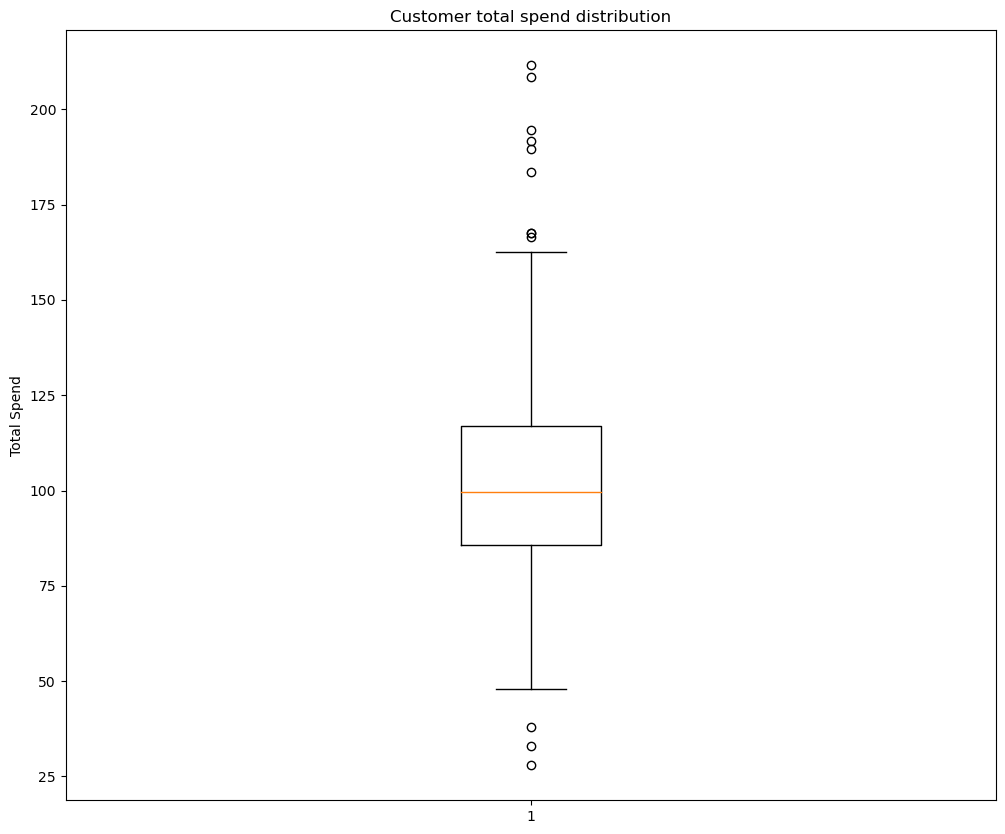

In [153]:
df3['total_spend'] = df3['total_spend'].astype(float)
plt.figure(figsize=(12,10))  
plt.boxplot(df3['total_spend'], vert=1)  
plt.ylabel('Total Spend')  
plt.title('Customer total spend distribution')
plt.show()

In [154]:
cursor = connection.cursor()
query = """SELECT MAX(r.rental_id) AS rental_id, film.title, 
           SUM(payment.amount) AS revenue
           FROM rental AS r
           JOIN inventory ON r.inventory_id = inventory.inventory_id
           JOIN film ON inventory.film_id = film.film_id
           JOIN payment ON r.rental_id = payment.rental_id
           GROUP BY film.title;
"""

cursor.execute(query)
result = cursor.fetchall()

     rental_id                  title revenue
0        11720     Graceland Dynamite   37.94
1        14948               Opus Ice   60.90
2        13899       Braveheart Human   16.95
3        15356         Wonderful Drop   46.92
4        15061        Rush Goodfellas   81.72
..         ...                    ...     ...
953      14963  Mockingbird Hollywood   53.78
954      14811     Gathering Calendar   19.90
955      15416         Drums Dynamite   24.87
956      15665           Samurai Lion  101.76
957      15077           Pond Seattle   61.82

[958 rows x 3 columns]


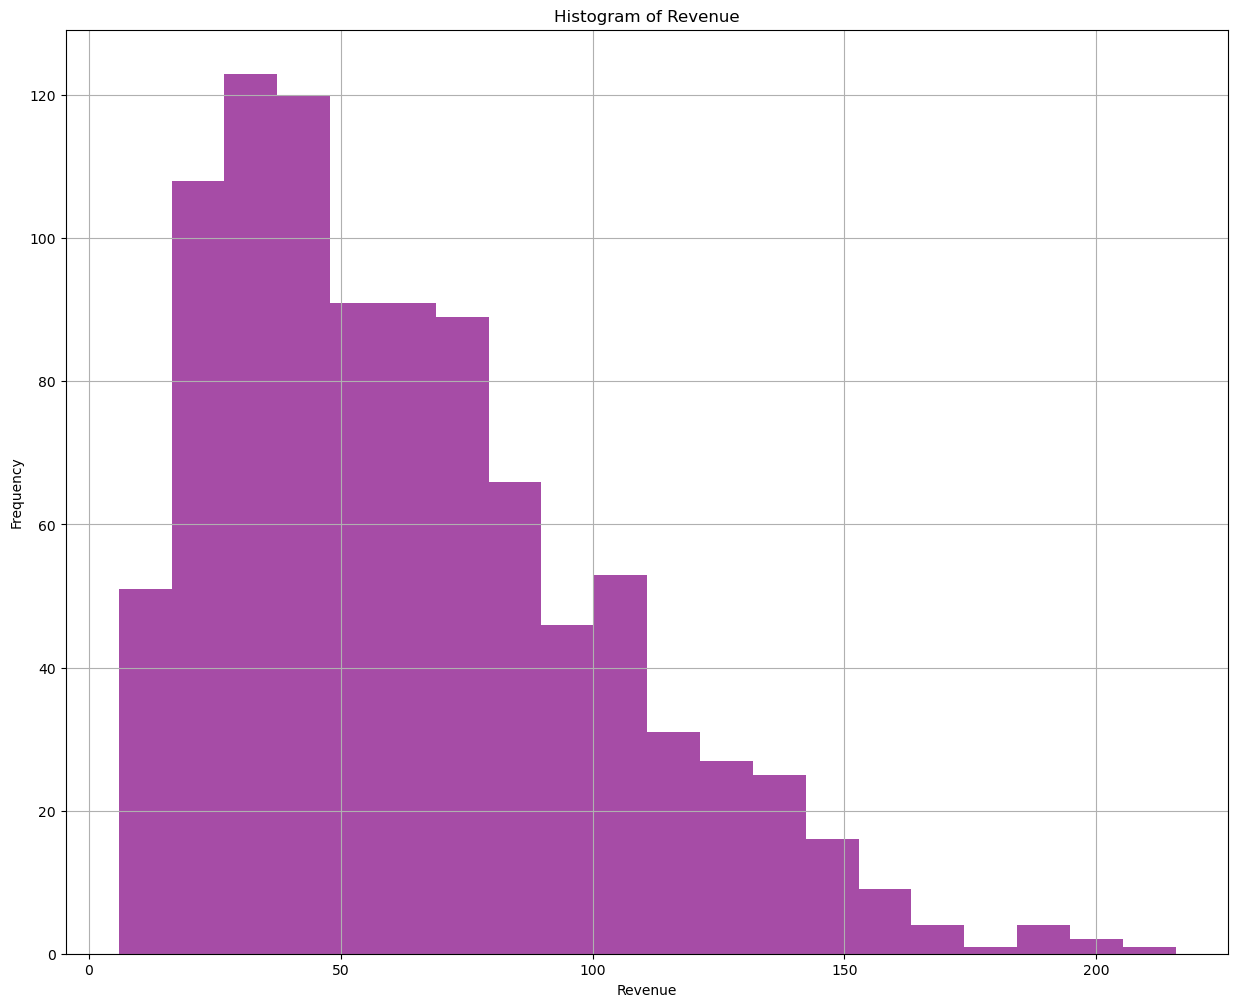

In [155]:
df4 = pd.DataFrame(result, columns=[ "rental_id", "title",
                                    "revenue"])
print(df4)


plt.figure(figsize=(15, 12))
plt.hist(df4['revenue'], bins=20, color='purple', alpha=0.7)
plt.xlabel('Revenue')  
plt.ylabel('Frequency')  
plt.title('Histogram of Revenue')  
plt.grid(True) 
plt.show()



In [156]:
cursor = connection.cursor()
query = """SELECT AVG(rental_rate) AS average_rating, rating
           FROM film
           GROUP BY rating;
"""

cursor.execute(query)
result = cursor.fetchall()

In [157]:
df5 = pd.DataFrame(result, columns=["rental_rate", "rating"])
df5

,rental_rate,rating
0,3.0348430493273543,PG-13
1,2.9709523809523810,NC-17
2,2.8888764044943820,G
3,3.0518556701030928,PG
4,2.9387179487179487,R


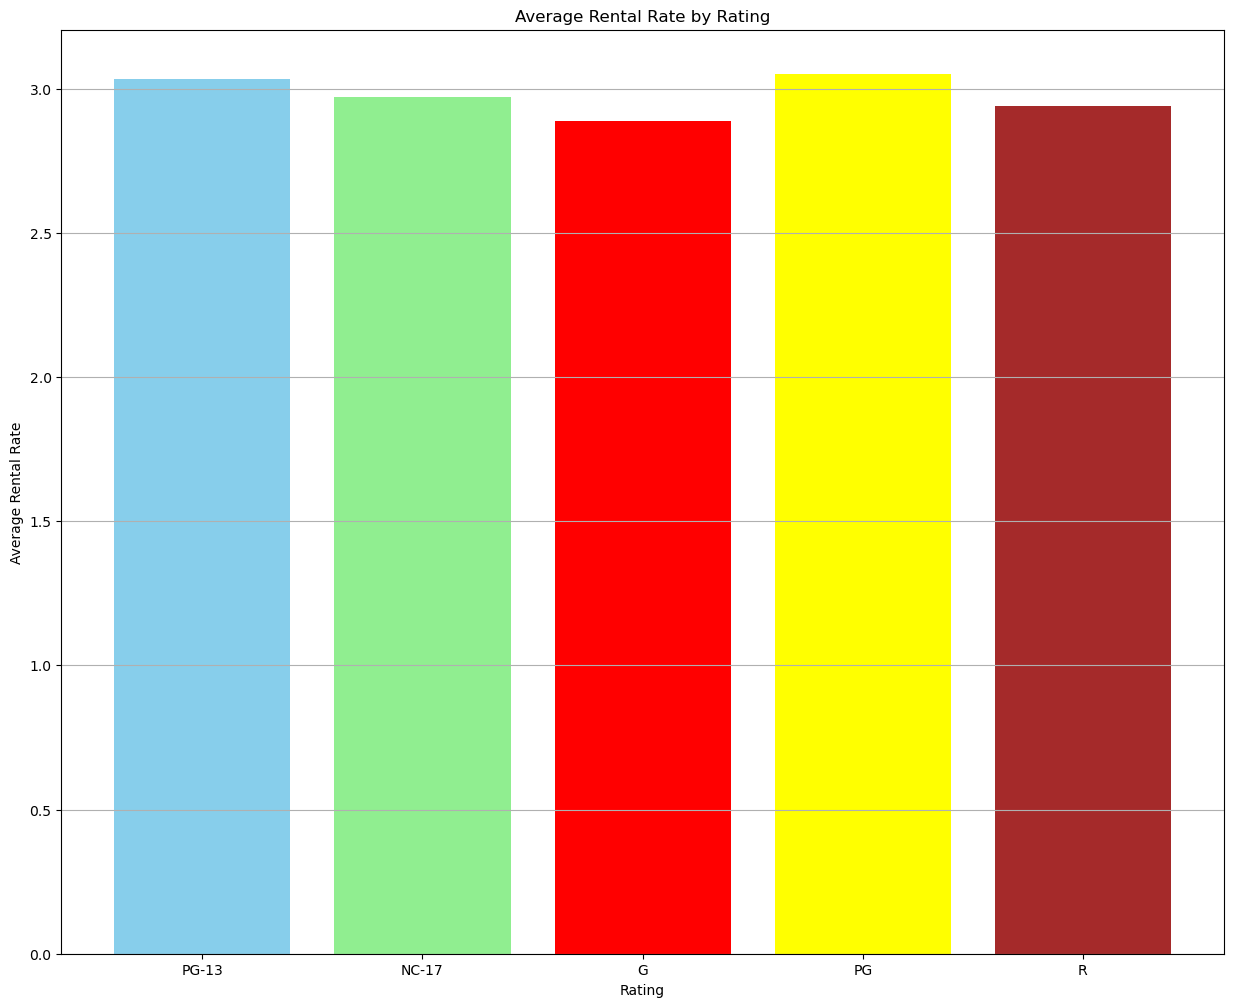

In [158]:
plt.figure(figsize=(15, 12))  
plt.bar(df5['rating'], df5['rental_rate'], 
        color = ['skyblue', 'lightgreen', 'red', 'yellow', 'brown'])
plt.xlabel('Rating')  
plt.ylabel('Average Rental Rate')  
plt.title('Average Rental Rate by Rating')  #
plt.grid(axis = 'y')  
plt.show()

In [159]:
### Treating each film as an independent observation, 
### we can see that the average rental rate differs across different movie ratings. 
### PG obviously has the highest rate while G rating films have the lowest rate averagely. 

In [160]:
cursor = connection.cursor()
query = """SELECT i.store_id, f.rating
           FROM rental AS r
           JOIN inventory i ON r.inventory_id = i.inventory_id
           JOIN film f ON i.film_id = f.film_id;
"""

cursor.execute(query)
result = cursor.fetchall()

In [161]:
df6 = pd.DataFrame(result, columns=["store_id", "rating"])
df6

,store_id,rating
0,2,R
1,2,G
2,1,R
3,2,NC-17
4,1,NC-17
...,...,...
16039,2,PG-13
16040,2,R
16041,1,PG-13
16042,2,G


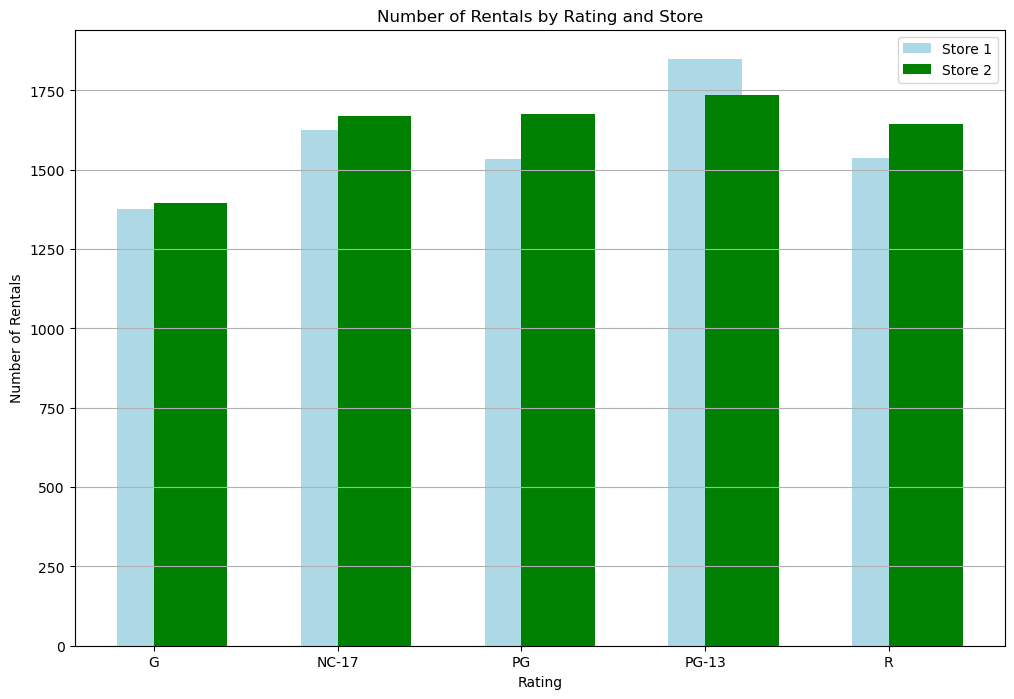

In [162]:
rental_counts = df6.groupby(['rating', 'store_id']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))


plt.bar(rental_counts.index, rental_counts[1], label='Store 1', width=0.4, align='center', color='lightblue')


plt.bar(rental_counts.index, rental_counts[2], label='Store 2', width=0.4, align='edge', color='green')

plt.xlabel('Rating')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals by Rating and Store')
plt.legend()
plt.grid(axis='y')
plt.show()

In [163]:
### From the chart we can see that in each rating the number of rentals from the two store are very close. 
### Store 1 slightly higher than Store 2 in PG-13 and Store 2 is higher than Store 1 in all other ratings.

In [164]:
cursor = connection.cursor()
query = """SELECT MAX(film.title), MAX(film.description), SUM(payment.amount), 'Robot' AS keyword
           FROM rental AS r
           JOIN inventory ON r.inventory_id = inventory.inventory_id
           JOIN film ON inventory.film_id = film.film_id
           JOIN payment ON r.rental_id = payment.rental_id
           WHERE film.description LIKE '%Robot%'
           GROUP BY keyword;
"""
cursor.execute(query)
result = cursor.fetchall()

In [165]:
df7 = pd.DataFrame(result, columns=["film.title","film.description", "payment.amount", "keyword"])
df7

,film.title,film.description,payment.amount,keyword
0,Yentl Idaho,A Unbelieveable Tale of a Pioneer And a Astron...,4524.17,Robot


In [166]:
cursor = connection.cursor()
query = """SELECT MAX(film.title), MAX(film.description), SUM(payment.amount), 'Teacher' AS keyword
           FROM rental AS r
           JOIN inventory ON r.inventory_id = inventory.inventory_id
           JOIN film ON inventory.film_id = film.film_id
           JOIN payment ON r.rental_id = payment.rental_id
           WHERE film.description LIKE '%Teacher%'
           GROUP BY keyword;
"""
cursor.execute(query)
result = cursor.fetchall()

In [167]:
df8 = pd.DataFrame(result, columns=["film.title","film.description", "payment.amount", "keyword"])
df8

,film.title,film.description,payment.amount,keyword
0,Youth Kick,A Unbelieveable Story of a Teacher And a Boat ...,4365.75,Teacher


In [168]:
combined = df7.append(df8, ignore_index=True)
combined

C:\Users\zph11\AppData\Local\Temp\ipykernel_5380\3878310925.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = df7.append(df8, ignore_index=True)


,film.title,film.description,payment.amount,keyword
0,Yentl Idaho,A Unbelieveable Tale of a Pioneer And a Astron...,4524.17,Robot
1,Youth Kick,A Unbelieveable Story of a Teacher And a Boat ...,4365.75,Teacher


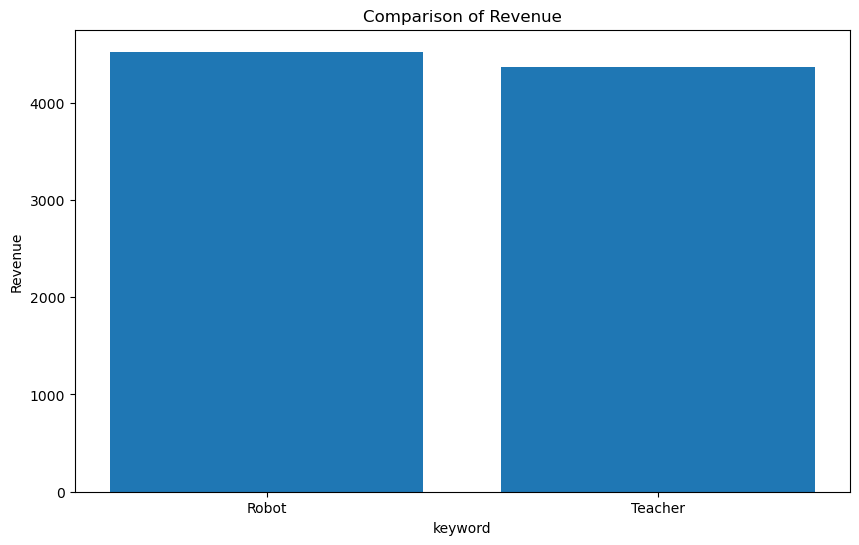

In [169]:
plt.figure(figsize=(10, 6))  
plt.bar(combined['keyword'], combined['payment.amount'])  

plt.xlabel('keyword')
plt.ylabel('Revenue')
plt.title('Comparison of Revenue')


plt.show()


In [170]:
### From the chart, we can see that the films containing "Robot" in its description generate higher revenue.

In [171]:
import seaborn as sns 
import numpy as np
from numpy.random import seed
from numpy.random import normal

In [172]:
seed(200)
x1 = normal(loc=15, scale=2, size=5)
x2 = normal(loc=15, scale=2, size=25)
x3 = normal(loc=15, scale=2, size=125)
x4 = normal(loc=15, scale=2, size=625)

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


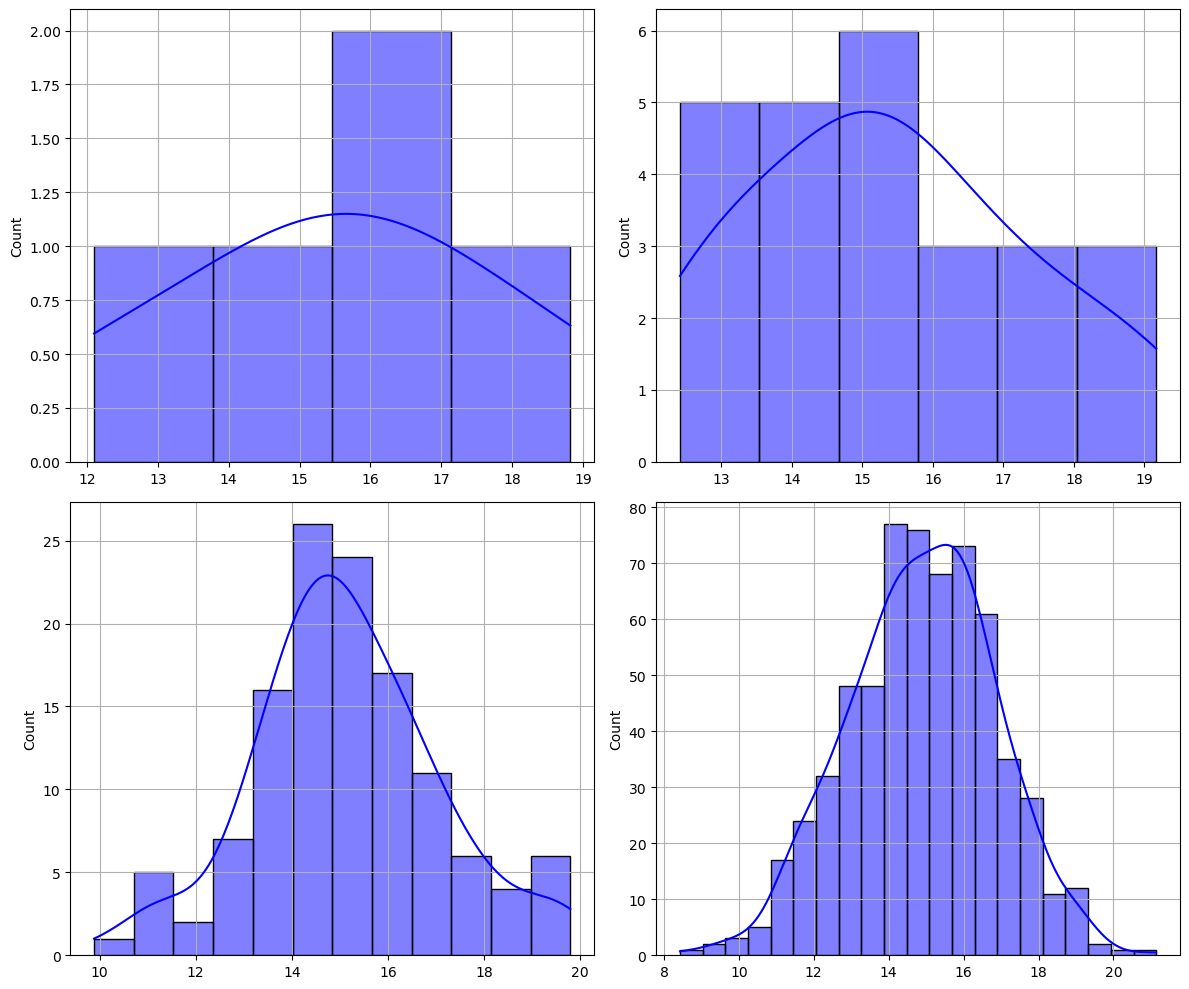

In [173]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12,10)) 
print(axs)

sns.histplot(x1, kde=True, ax=axs[0][0], color="blue")
sns.histplot(x2, kde=True, ax=axs[0][1], color="blue")
sns.histplot(x3, kde=True, ax=axs[1][0], color="blue")
sns.histplot(x4, kde=True, ax=axs[1][1], color="blue")


plt.tight_layout()

for ax in axs.flat: 
    ax.grid(True)

plt.show()

In [174]:
mean1 = np.mean(x1)
mean2 = np.mean(x2)
mean3 = np.mean(x3)
mean4 = np.mean(x4)

std1 = np.std(x1, ddof=1)
std2 = np.std(x2, ddof=1)
std3 = np.std(x3, ddof=1)
std4 = np.std(x4, ddof=1)

ster1 = std1 / np.sqrt(len(x1))
ster2 = std2 / np.sqrt(len(x2))
ster3 = std3 / np.sqrt(len(x3))
ster4 = std4 / np.sqrt(len(x4))

print("x1:", "Mean:", mean1, "Standard Deviation:", std1, "Standard Error:", ster1)
print("x2:", "Mean:", mean2, "Standard Deviation:", std2, "Standard Error:", ster2)
print("x3:", "Mean:", mean3, "Standard Deviation:", std3, "Standard Error:", ster3)
print("x4:", "Mean:", mean4, "Standard Deviation:", std4, "Standard Error:", ster4)

x1: Mean: 15.514244794423075 Standard Deviation: 2.4749216338183473 Standard Error: 1.1068186024405333
x2: Mean: 15.38155905795485 Standard Deviation: 1.9974624703136055 Standard Error: 0.3994924940627211
x3: Mean: 15.127359290503641 Standard Deviation: 1.9279950027254826 Standard Error: 0.17244511545496286
x4: Mean: 14.887092033617716 Standard Deviation: 1.9530800573094382 Standard Error: 0.07812320229237753


In [175]:
### As the sample size becomes bigger, the sample mean approaches the real mean.
### As the sample size becomes bigger, the standard deviation approaches the true standard deviation.
### As the sample size becomes bigger, 
### the standard error tends to become smaller since the sample size n increases when the standard error stays stable around 2.
### As the sample size becomes bigger, the sample mean and standard deviation become more stable. 
### When the sample size is small, 
### it deviates significanly from the true distribution since the size is not big enough to represent the population.


In [176]:
from numpy.random import seed
from numpy.random import poisson

In [177]:
seed(100)

p = poisson(lam=12, size=1200)

pmean = np.mean(p)

pvar = np.var(p)

print(p)
print(pmean)
print(pvar)

[12 11  7 ... 18 13  7]
11.798333333333334
11.847663888888889


In [178]:
### The mean and Variance are very close to lambda (12) but do not equal to it.
### As the sample size become bigger, I think mean and variance will get close to 12.

In [179]:
seed(100)

p = poisson(lam=12, size=4)

pmean = np.mean(p)

pvar = np.var(p)

print(p)
print(pmean)
print(pvar)

[12 11  7 17]
11.75
12.6875


In [180]:
### As the sample size becomes smaller, the mean and variance deviate from 12 which is the lambda.

In [181]:
# The outcome in this scenario 
# is to assess the effectiveness of the promotion program. 
# We can evaluate the program by examining the customer spending
# before and after the promotion.
 

In [182]:
## The main predictor that the owner wants understand the impact of is
## the change of the cusotmer spending after the promotion.

In [183]:
### Null hypothesis H0: The customer spending did not change significantly
### after the promotion program.
### Alternative hypothesis H1: The customer spending changed significantly
### after the promotion program. 

In [184]:
cursor = connection.cursor()
query = """
with b4 as (
select p.customer_id, sum(p.amount) as Payment_before
from rental r 
left outer join payment p on p.rental_id = r.rental_id
where rental_date < cast('2005-07-01' as timestamp) and
amount is not null
group by p.customer_id),

aft as (
select p.customer_id, sum(p.amount) as Payment_after
from rental r 
left outer join payment p on p.rental_id = r.rental_id
where rental_date >= cast('2005-07-01' as timestamp) and
amount is not null
group by p.customer_id
)

select distinct c.customer_id, store_id, first_name, last_name,
active, payment_before, payment_after
from customer c
left outer join b4 r on r.customer_id = c.customer_id
left outer join aft a on a.customer_id = c.customer_id
where payment_after is not null and payment_before is not null
"""
cursor.execute(query)
result = cursor.fetchall()

In [185]:
df9 = pd.DataFrame(result, columns=["customer_id", 
                                        "store_id", 
                                        "first_name", 
                                        "last_name", 
                                        "active", 
                                        "payment_before",
                                        "payment_after"])
summary = df9.describe()
summary

,customer_id,store_id,active
count,518.000000,518.000000,518.000000
mean,299.144788,1.455598,0.974903
std,184.868891,0.498506,0.156570
min,1.000000,1.000000,0.000000
25%,132.250000,1.000000,1.000000
50%,262.500000,1.000000,1.000000
75%,468.750000,2.000000,1.000000
max,599.000000,2.000000,1.000000


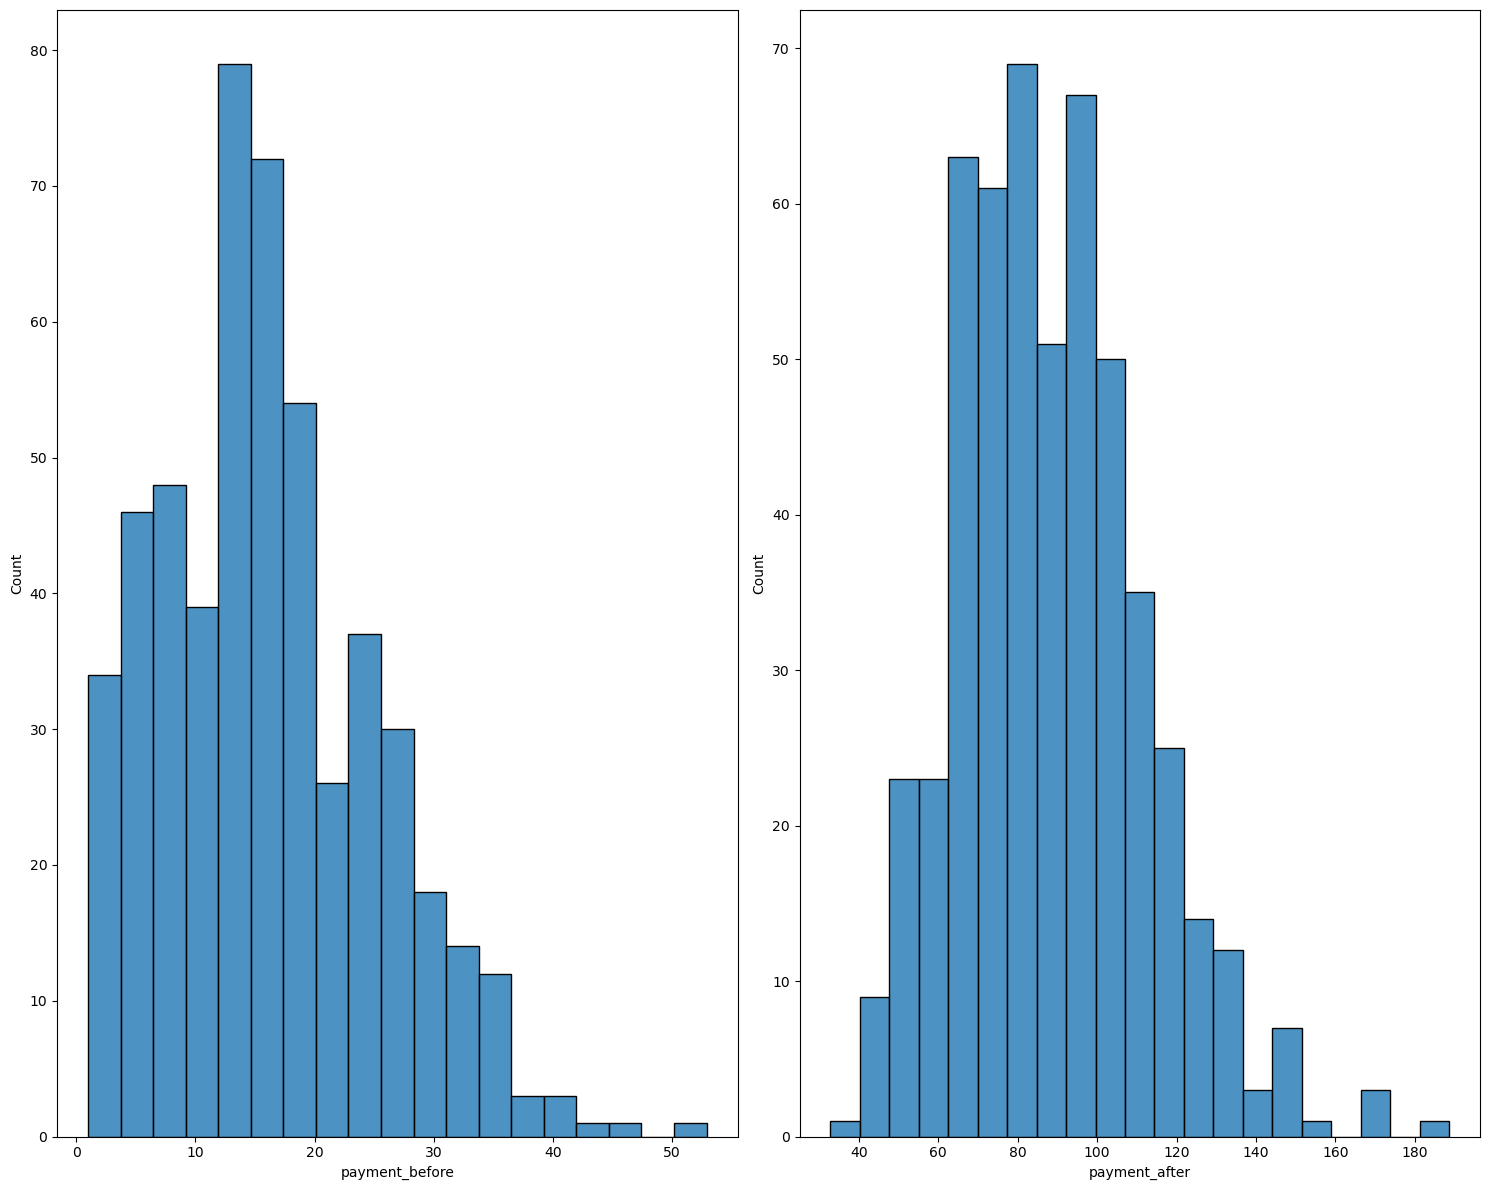

In [186]:
fig, axs = plt.subplots(1,2,figsize=(15,12))

sns.histplot(df9["payment_before"], ax=axs[0], alpha = 0.8)

sns.histplot(df9["payment_after"], ax=axs[1], alpha = 0.8)


plt.tight_layout()
plt.show()

In [187]:
df9["payment_before"] = df9["payment_before"].astype(float)
df9["payment_after"] = df9["payment_after"].astype(float)

payment_before = df9["payment_before"]
payment_after = df9["payment_after"] 

correlation = np.corrcoef([payment_before, payment_after])[0, 1]
print(correlation)

0.02549906450099287


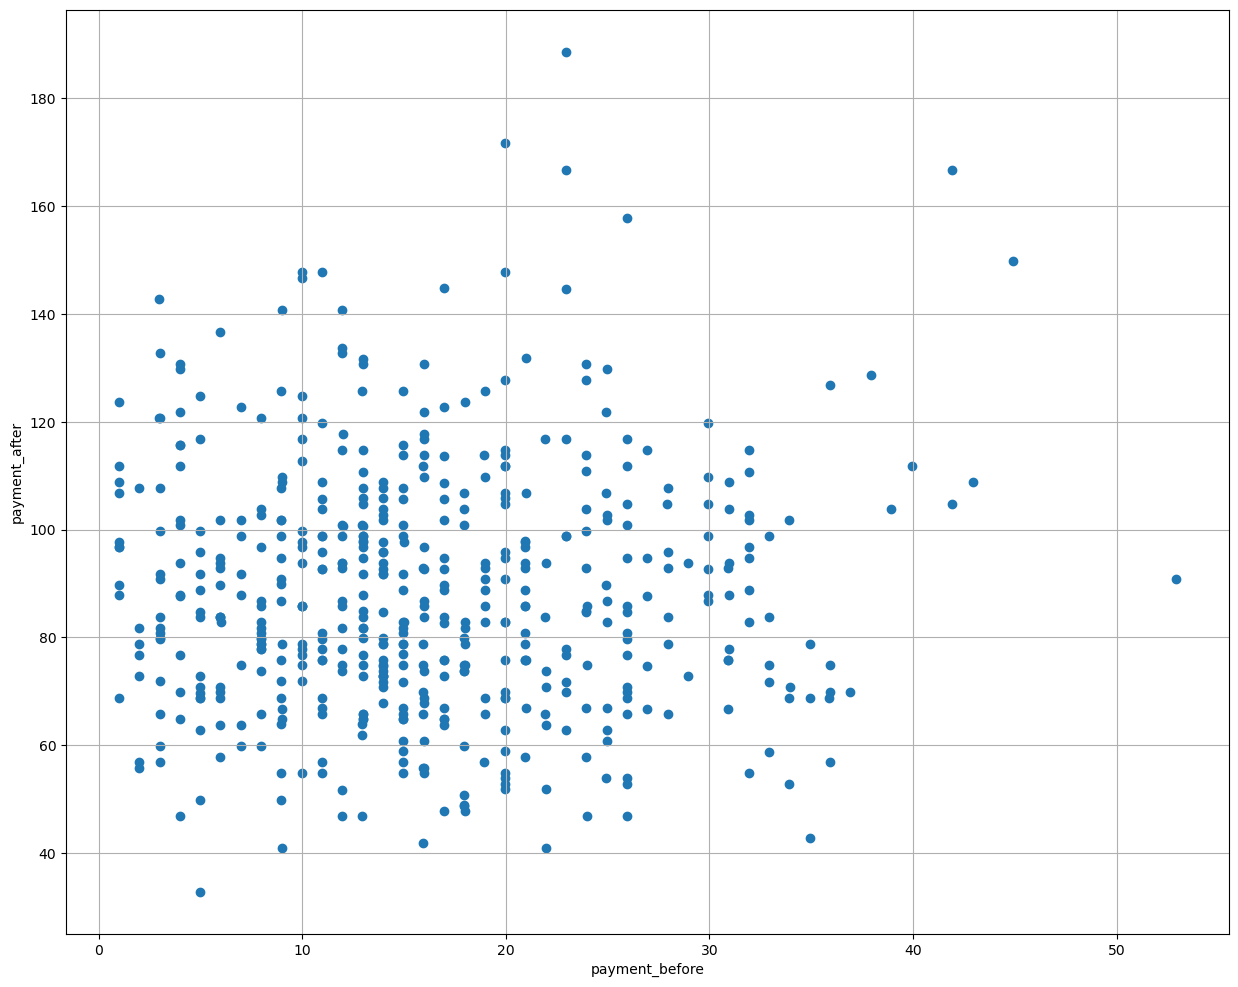

In [188]:
plt.figure(figsize=(15,12))
plt.scatter(x = payment_before, y = payment_after)

plt.xlabel("payment_before")
plt.ylabel("payment_after")
plt.grid(True)
plt.show()

In [189]:
df9["payment_difference"] = payment_before - payment_after
display(df9)

,customer_id,store_id,first_name,last_name,active,payment_before,payment_after,payment_difference
0,145,1,Lucille,Holmes,1,5.98,101.75,-95.77
1,165,2,Lorraine,Stephens,1,6.98,74.82,-67.84
2,29,2,Angela,Hernandez,1,21.93,116.72,-94.79
3,239,2,Minnie,Romero,1,23.95,84.77,-60.82
4,250,2,Jo,Fowler,1,4.99,49.86,-44.87
...,...,...,...,...,...,...,...,...
513,38,1,Martha,Gonzalez,1,15.95,111.71,-95.76
514,362,1,Nicholas,Barfield,1,14.95,125.74,-110.79
515,176,1,June,Carroll,1,42.92,108.76,-65.84
516,134,1,Emma,Boyd,1,17.96,59.85,-41.89


In [190]:
from scipy import stats

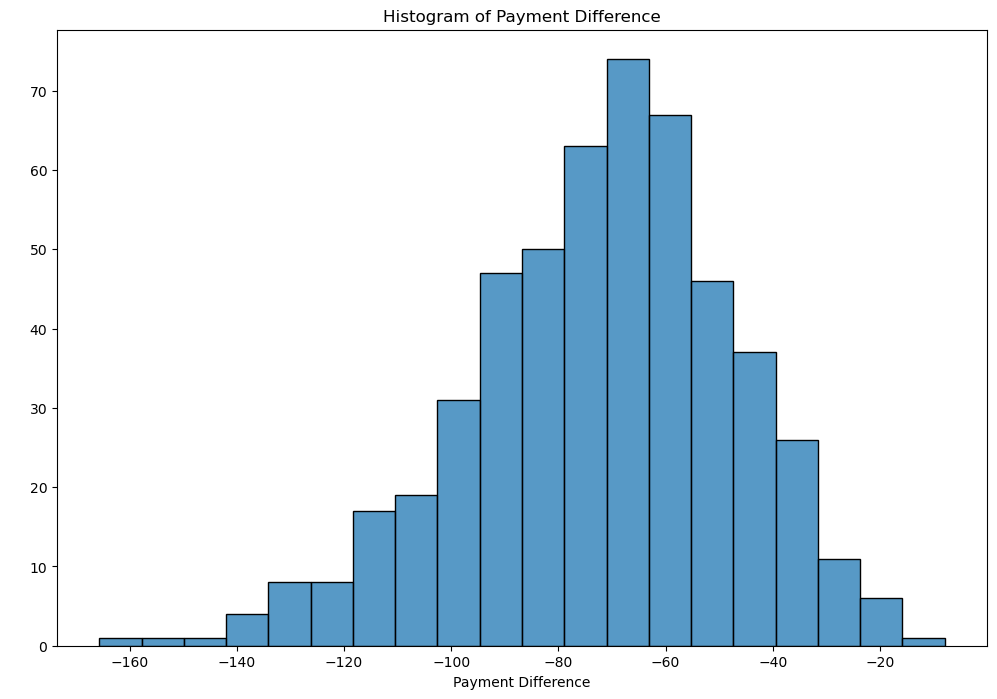

In [191]:
plt.figure(figsize=[12,8])
sns.histplot(df9["payment_difference"])

plt.title('Histogram of Payment Difference')
plt.xlabel('Payment Difference')
plt.ylabel(' ')
plt.show()

In [192]:
t_stat, p_value = stats.ttest_1samp(df9["payment_difference"], 
                                    0, alternative="two-sided")

alpha = 0.05 

if p_value < alpha:
    print("Reject H0")
else:
    print("Reject H1")

Reject H0


In [193]:
# The result of one-sample t-test shows that there is significant evidence to 
# say that the customer spending is different (increased) after the promotion.
# We can confidently conclude that the program help the owner to change
# the customer spending habit.
